# Hypothesis Testing

## Overview Exercise Set

### 1. Has the network latency gone up since we switched internet service providers?

$H_{0}$ = The network latency has not changed or it has decreased since we switched internet service providers.

$H_{1}$ = The network latency has increased since we switched internet service providers.

- True positive = I determine that the network latency has increased and it has. 
- True negative = I determine that the network latency has stayed the same or decreased and it has.
- Type I error = I determine that the network latency has increased when it has actually decreased or stayed the same.
- Type II error = I determine that the network latency has decreased or stayed the same when it has actually increased. 

<u>Note</u>: This would be determined via a **paired t-test**, in which we look at a sample of our data under the previous condition (old internet service provider), and then look at a sample of our data under the current condition (new internet service provider). A paired t-test is used when we are interested in the difference between two variables for the same subject, and often the two variables are separated by time.

### 2. Is the website redesign any good?

Uhh...could you be any more vague?

$H_{0}$ = There has been no change in daily website visits or daily website visits have decreased since deploying the redesigned website.

$H_{1}$ = There has been an increase in daily website visits since deploying the redesigned website. 

- True positive = I determine that the number of daily website visits has increased and it has (RELATED TO THE WEBSITE REDESIGN, but also not claiming causality -- just a relationship) 
- True negative = I determine that the number of daily website visits has stayed the same or decreased and it has.
- Type I error = I determine that the nnumber of daily website visits has increased when it has actually decreased or stayed the same.
- Type II error = I determine that the number of daily website visits has decreased or stayed the same when it has actually increased. 

<u>Note</u>: Think about the number of confounding factors that might drive changes to a websites activity beyond a simple redesign. If we are launching the new website the day before Black Friday, it is inappopriate to compare that to the previous day. We would need to compare it to the last website on Black Friday. Sometimes perfect comparisons are not achievable in the rapidly changing business world, but we must do our best to adequately control for as many factors as we can. This could be achieved through A/B testing, where we run two versions of the website at the same time and look at our comparable metrics. This would be more ideal than a **paired t-test** approach, as we could utilize an **independent samples t-test**, and generally its easier to control confounding factors with this approach.  

### 3. Is our television ad driving more sales?

This could be interpreted as a simple **paired** testing approach again, but I'm going to pretend that we are in a large company that does business across multiple similar markets and is using an A/B testing approach to determine which ad is better. Furthermore, I'm going to assume that we have taken a reasonable amount of time to observe the sales volumes in both markets (i.e. we aren't jumping to conclusions after one day, but are waiting at least one week (hopefully one month). 

$H_{0}$ = Sales volume is NOT greater with the new ad

$H_{1}$ = Sales volume is greater with the new ad

- True positive = I determine that the sales volume has increased and it has. 
- True negative = I determine that the sales volume has stayed the same or decreased and it has.
- Type I error = I determine that the sales volume has increased when it has actually decreased or stayed the same.
- Type II error = I determine that the sales volume has decreased or stayed the same when it has actually increased.

<u>Note</u>: By wording my null hypothesis as the antithesis to the alternative hypothesis, I have captured all possible outcomes between the two hypotheses. 

In [ ]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

## Comparing Means Exercises

#### 1. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

What are we comparing?
- average time (numeric continuous values) for two different groups (categories) 
- One sample or two sample?
- One tailed or two tailed?

Form a hypothesis:

In [10]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# H_0: Average time to sell at office 1 == average time to sell at office 2
# H_a: Average time to sell at office 1 != average time to sell at office 2

In [3]:
alpha = 0.05

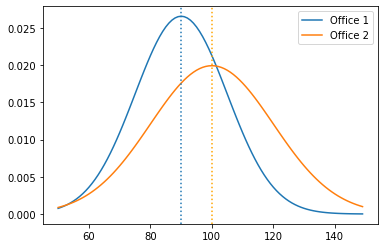

In [11]:
# visualize distributions

x = np.arange(50, 150)

y1 = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)

plt.plot(x, y1, label = 'Office 1')
plt.plot(x, y2, label = 'Office 2')
plt.axvline(90, ls=':')
plt.axvline(100, ls=':', color = 'orange')

plt.legend()

In [12]:
# using scipy to calculate t & p

t, p = stats.ttest_ind_from_stats(90, 15, 40, 100, 20, 50, equal_var=False)
t, p

(-2.7091418459143854, 0.00811206270346016)

In [13]:
if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis.


#### 2. Load the mpg dataset and use it to answer the following questions:

In [14]:
from pydataset import data
mpg = data('mpg')

In [15]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


a. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

What are we comparing?
One sample or two sample?
One tailed or two tailed?

In [16]:
# H_0: There is no difference in fuel-efficiency in cars from 2008 and 1999
# H_a: There is a difference in fuel-efficiency in cars from 2008 and 1999

How should we measure "fuel-efficency"?

Two approaches:
1. Run two t-tests. One for highway mileage. One for city mileage.
2. Run one t-test using the mean for highway and city....

#### ...but which mean?

In [17]:
mpg['avg_fe'] = stats.hmean(mpg[['cty', 'hwy']], axis=1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [18]:
fe_2008 = mpg[mpg.year == 2008].avg_fe
fe_1999 = mpg[mpg.year == 1999].avg_fe

<AxesSubplot:>

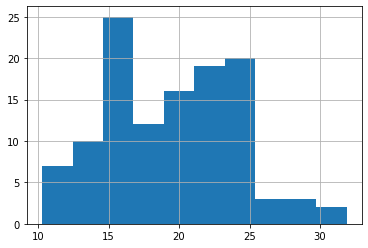

In [19]:
# plot these distributions
fe_2008.hist()

<AxesSubplot:>

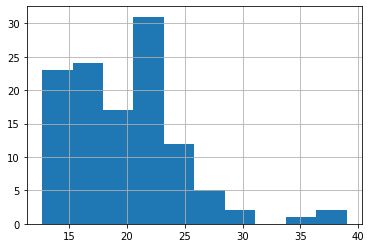

In [20]:
fe_1999.hist()

In [21]:
fe_2008.count()

117

In [22]:
fe_1999.count() # Normality not an issue due to sample sizes

117

In [23]:
# What about the variance
fe_2008.var(), fe_1999.var()

(22.550836772260343, 25.850396545865912)

In [24]:
# Levenes test
stats.levene(fe_2008, fe_1999)

LeveneResult(statistic=0.031071867429515194, pvalue=0.8602339200830025)

In [26]:
# calculate t & p
t, p = stats.ttest_ind(fe_2008, fe_1999)
t, p

(-0.3011962975077886, 0.7635345888327115)

In [27]:
if p < alpha:
    print('Reject null')
else:
    print('fail to reject null')

fail to reject null


In [28]:
fe_2008.mean(), fe_1999.mean()

(19.488662986569054, 19.68238764869729)

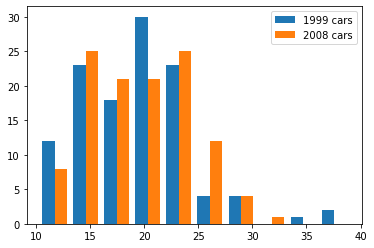

In [29]:
plt.hist([fe_1999, fe_2008], label=['1999 cars', '2008 cars'])
plt.legend(loc="upper right")

b. Are compact cars more fuel-efficient than the average car?

In [30]:
# H_0: MPG for compact cars <= mpg for the average car
# H_a: MPG for compact cars > mpg for the average car

In [32]:
fe_compact = mpg[mpg['class'] == 'compact'].avg_fe
pop_mean = mpg.avg_fe.mean()

In [33]:
pop_mean

19.585525317633177

In [34]:
fe_compact.mean()

23.500416808701296

<AxesSubplot:>

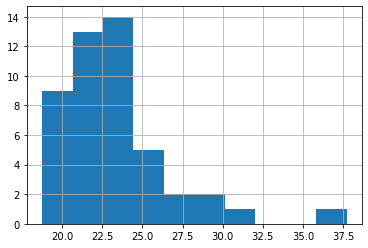

In [35]:
fe_compact.hist()

In [36]:
# calculate t & p
t, p = stats.ttest_1samp(fe_compact, pop_mean)
t, p

(7.512360093161354, 1.5617666348807727e-09)

In [38]:
if (p/2 < alpha) and t > 0:
    print('Reject null')

Reject null


c. Do manual cars get better gas mileage than automatic cars?

In [39]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [40]:
mpg.trans.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [41]:
fe_auto = mpg[mpg.trans.str.contains('auto')].avg_fe
fe_manual = mpg[mpg.trans.str.contains('manual')].avg_fe

<AxesSubplot:>

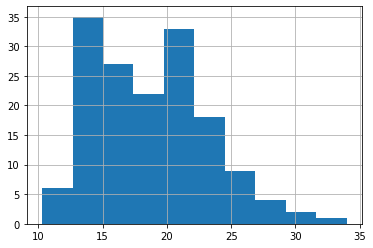

In [44]:
fe_auto.hist()

<AxesSubplot:>

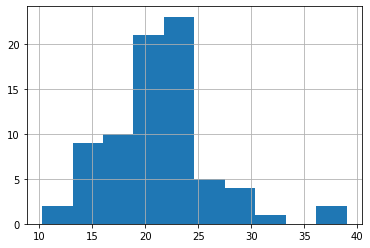

In [45]:
fe_manual.hist()

In [46]:
# look at variance
fe_auto.var(), fe_manual.var()

(20.428279095002054, 25.665633639828275)

In [47]:
# levene test
stats.levene(fe_auto, fe_manual)

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

In [48]:
t, p = stats.ttest_ind(fe_manual, fe_auto, equal_var=True)
t, p/2

(4.652577547151351, 2.7552323050220026e-06)

In [49]:
fe_manual.mean(), fe_auto.mean()

(21.629228592155194, 18.583199507835747)

In [50]:
mpg['transmission_type'] = np.where(mpg.trans.str.contains('auto'), 'Auto Transmission', 'Manual Transmission')

In [51]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe,transmission_type
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766,Auto Transmission
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000,Manual Transmission
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725,Manual Transmission
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882,Auto Transmission
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524,Auto Transmission
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,22.638298,Auto Transmission
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,24.360000,Manual Transmission
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,19.809524,Auto Transmission
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,21.272727,Manual Transmission


Text(0.5, 1.0, 'Manual transmission gets better fuel effiency')

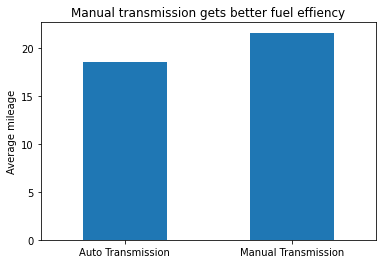

In [57]:
mpg.groupby('transmission_type').avg_fe.mean().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Average mileage')
plt.title('Manual transmission gets better fuel effiency')